# ACUTE LYMPHOBLASTIC LEUKEMIA CLASSIFICATION USING MACHINE LEARNING

<font color=blue>Author : Arnanda Prabaswara</font>

In this notebook, we will build various machine learnig models to classify cancer cell in Acute Lymphobastic Leukemia disease. In short, Acute Lymphoblastic Leukemia (ALL) is blood cancer that can be identified by observing spread of the cancer cell which is lympholastic cell. 
In this project, our approach is using various machine learning model, such as Support Vector Machine, K-Nearest Neighors, Random Forest, Naive Bayes and Neural Network, to classify lymphoblast (cancer cell) and non lymphoblast cell (healthy cell).

In [2]:
import pandas as pd

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)



First, we load the excel data which contain features data of lymphoblast cell and non lymphoblast cell

In [ ]:
limfoblas = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='limfoblas')
limfosit = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='limfosit')
segmen = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='segmen')
stab = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='stab')
monosit = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='monosit')
metamielosit = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='metamielosit')
promonosit = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='promonosit')
mielosit = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='mielosit')
nrbc = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='nrbc')
limfoma = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='limfoma')
monoblas = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='monoblas')
mieloblas = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='mieloblas')
sel_plasma = pd.read_excel('F:/Teknik-Fisika/Skripsi/Klasifikasi ALL/Data fix.xlsx', sheet_name='sel plasma')


In [ ]:
frames = [limfoblas, limfosit, segmen, stab, monosit, metamielosit, promonosit, mielosit, nrbc, limfoma, monoblas, mieloblas, sel_plasma]
df = pd.concat(frames, ignore_index=True)
df.head()

Convert excel data into csv format

In [ ]:
df = df.rename(columns={"No Citra":"No_Citra"})
df.to_csv("ALL_extraction.csv", index=False)

In [3]:
al = pd.read_csv("ALL_extraction.csv")
al.head()

,No_Citra,LuasInti,KelilingInti,SolidityInti,GranularityInti,CircularityInti,RerataRInti,RerataGInti,RerataBInti,EntropiInti,...,EntropiSitoplasma,EnergiSitoplasma,KontrasSitoplasma,HomogenitasSitoplasma,LuasNormalInti,KelilingNormalInti,Eccentricity,LIperLP,KIperKP,Fraktal
0,Limfoblas,163301,4488,0.322083,108.914566,0.101881,108.278999,2.660602,67.670677,1.484211,...,0.378619,0.841596,237.830643,0.945530,0.498148,1.951304,0.777343,0.863994,0.663709,1.8206
1,Limfoblas,67873,2718,0.320712,107.534103,0.115454,102.630638,3.511477,63.413055,1.442138,...,0.587819,0.753984,491.352722,0.914822,0.478215,1.795244,0.831555,0.794384,0.443249,1.7671
2,Limfoblas,97163,3069,0.330075,105.044075,0.129633,135.054153,2.966990,82.312477,1.685688,...,0.205449,0.919587,211.439163,0.965006,0.624609,1.944867,0.944942,0.945138,0.964185,1.7987
3,Limfoblas,74163,2880,0.327015,90.916359,0.112360,105.975555,2.767091,53.962898,1.567923,...,0.515515,0.772667,211.412567,0.924331,0.579308,2.011173,0.833314,0.834746,0.675106,1.7654
4,Limfoblas,199997,4632,0.327324,111.507469,0.117138,132.304062,3.442453,97.157463,1.518860,...,0.464202,0.799417,224.906448,0.933804,0.585413,1.981181,0.877510,0.851595,0.795057,1.8390


In [ ]:
al.dtypes

We look data distrbution of cells

In [ ]:
data = go.Histogram(x=al.No_Citra)
fig = go.Figure(data=data)
iplot(fig)

We can know from the Histogram chart, there are some classes besides lymphoblast cell class. Another class besides lymphoblast, we grouped in one class, non lymphoblast class.

In [4]:
al1 = pd.read_csv("ALL_extraction.csv", index_col='No_Citra')
al1.head()


,LuasInti,KelilingInti,SolidityInti,GranularityInti,CircularityInti,RerataRInti,RerataGInti,RerataBInti,EntropiInti,EnergiInti,...,EntropiSitoplasma,EnergiSitoplasma,KontrasSitoplasma,HomogenitasSitoplasma,LuasNormalInti,KelilingNormalInti,Eccentricity,LIperLP,KIperKP,Fraktal
No_Citra,,,,,,,,,,,,,,,,,,,,,
Limfoblas,163301,4488,0.322083,108.914566,0.101881,108.278999,2.660602,67.670677,1.484211,0.251403,...,0.378619,0.841596,237.830643,0.945530,0.498148,1.951304,0.777343,0.863994,0.663709,1.8206
Limfoblas,67873,2718,0.320712,107.534103,0.115454,102.630638,3.511477,63.413055,1.442138,0.270630,...,0.587819,0.753984,491.352722,0.914822,0.478215,1.795244,0.831555,0.794384,0.443249,1.7671
Limfoblas,97163,3069,0.330075,105.044075,0.129633,135.054153,2.966990,82.312477,1.685688,0.142714,...,0.205449,0.919587,211.439163,0.965006,0.624609,1.944867,0.944942,0.945138,0.964185,1.7987
Limfoblas,74163,2880,0.327015,90.916359,0.112360,105.975555,2.767091,53.962898,1.567923,0.178496,...,0.515515,0.772667,211.412567,0.924331,0.579308,2.011173,0.833314,0.834746,0.675106,1.7654
Limfoblas,199997,4632,0.327324,111.507469,0.117138,132.304062,3.442453,97.157463,1.518860,0.176372,...,0.464202,0.799417,224.906448,0.933804,0.585413,1.981181,0.877510,0.851595,0.795057,1.8390


In [5]:
al2 = al1.rename(index={
    'Limfoblas':'Limfoblas',
    'Limfosit':'Non_Limfoblas',
    'Segmen':'Non_Limfoblas',
    'Stab':'Non_Limfoblas',
    'Monosit':'Non_Limfoblas',
    'Metamielosit':'Non_Limfoblas',
    'Promonosit':'Non_Limfoblas',
    'Mielosit':'Non_Limfoblas',
    'NRBC':'Non_Limfoblas',
    'Limfoma':'Non_Limfoblas',
    'Monoblas':'Non_Limfoblas',
    'Mieloblas':'Non_Limfoblas',
    'Sel Plasma':'Non_Limfoblas'
})


In [6]:
al3 = al2.reset_index()
al3.head()

,No_Citra,LuasInti,KelilingInti,SolidityInti,GranularityInti,CircularityInti,RerataRInti,RerataGInti,RerataBInti,EntropiInti,...,EntropiSitoplasma,EnergiSitoplasma,KontrasSitoplasma,HomogenitasSitoplasma,LuasNormalInti,KelilingNormalInti,Eccentricity,LIperLP,KIperKP,Fraktal
0,Limfoblas,163301,4488,0.322083,108.914566,0.101881,108.278999,2.660602,67.670677,1.484211,...,0.378619,0.841596,237.830643,0.945530,0.498148,1.951304,0.777343,0.863994,0.663709,1.8206
1,Limfoblas,67873,2718,0.320712,107.534103,0.115454,102.630638,3.511477,63.413055,1.442138,...,0.587819,0.753984,491.352722,0.914822,0.478215,1.795244,0.831555,0.794384,0.443249,1.7671
2,Limfoblas,97163,3069,0.330075,105.044075,0.129633,135.054153,2.966990,82.312477,1.685688,...,0.205449,0.919587,211.439163,0.965006,0.624609,1.944867,0.944942,0.945138,0.964185,1.7987
3,Limfoblas,74163,2880,0.327015,90.916359,0.112360,105.975555,2.767091,53.962898,1.567923,...,0.515515,0.772667,211.412567,0.924331,0.579308,2.011173,0.833314,0.834746,0.675106,1.7654
4,Limfoblas,199997,4632,0.327324,111.507469,0.117138,132.304062,3.442453,97.157463,1.518860,...,0.464202,0.799417,224.906448,0.933804,0.585413,1.981181,0.877510,0.851595,0.795057,1.8390


After we change classes besides lymphoblast into one class, non lymphoblast, we can look the distribution of 2 classes

In [ ]:
data = go.Histogram(x=al3.No_Citra)
fig = go.Figure(data=data)
iplot(fig)

Look like we meet imbalanced data, we need to solve this problem by using oversample

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

y = al3.No_Citra
X = al3.drop(['No_Citra'], axis=1)


Using SMOTE method by imblearn python module to oversampling the data, so the data distribution can balanced each other

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X, y)


In [ ]:
y_over = pd.Series(y_res)
y_over.value_counts().plot(kind='bar')

Distribution data after oversampling are balanced. We can continue to build machine learning models and train the data

# Build Machine Learning Models

Divide the data for training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.8, test_size=0.2, random_state=0)

# SVC

Choose different models of Support Machine Classifier based on their kernel

In [ ]:
from sklearn.svm import SVC

def SVC_RBF(X_train, X_test, y_train, y_test):
    model = SVC(gamma='scale', kernel='rbf')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)


def SVC_Linear(X_train, X_test, y_train, y_test):
    model = SVC(gamma='scale', kernel='linear')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)


def SVC_Sigmoid(X_train, X_test, y_train, y_test):
    model = SVC(gamma='scale', kernel='sigmoid')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)


def SVC_Polynomial(X_train, X_test, y_train, y_test):
    model = SVC(gamma='scale', kernel='poly')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)

In [ ]:
print('Accuracy yang didapatkan dari SVC dengan RBF kernel')
print(SVC_RBF(X_train, X_test, y_train, y_test))
print('Accuracy yang didapatkan dari SVC dengan Linear kernel')
print(SVC_Linear(X_train, X_test, y_train, y_test))
print('Accuracy yang didapatkan dari SVC dengan Sigmoid kernel')
print(SVC_Sigmoid(X_train, X_test, y_train, y_test))
print('Accuracy yang didapatkan dari SVC dengan Polynomial kernel')
print(SVC_Polynomial(X_train, X_test, y_train, y_test))

The best SVC model choosed to be visualized all over perfomance

In [ ]:
model = SVC(gamma='scale', kernel='linear')
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))
confutrix_SVC = pd.DataFrame(confusion_matrix(y_test, pred), index=['true Good','true Bad'], columns=['Pred Good', 'Pred Bad'] )
print(confutrix_SVC)
print(classification_report(y_test, pred))

# Random Forest

Using Random Forest Classifier Model

In [ ]:
model = RandomForestClassifier(n_estimators=10000, max_features='auto', random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print('\n Model Accuracy:', accuracy_score(y_test, pred))
confutrix_RF = pd.DataFrame(confusion_matrix(y_test, pred), index=['true Good','true Bad'], columns=['Pred Good', 'Pred Bad'] )
print(confutrix_RF)
print(classification_report(y_test, pred))


# Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
pred = model.predict(X_test) 
confutrix_NB = pd.DataFrame(confusion_matrix(y_test, pred), index=['true Good','true Bad'], columns=['Pred Good', 'Pred Bad'] )
report = classification_report(y_test, pred)
print('Model Accuracy:', accuracy_score(y_test, pred))
print(confutrix_NB)
print(report)


# K-Nearest Neighbors

In [ ]:
def KNN_KDT(X_train, X_test, y_train, y_test):
    model = KNN(n_neighbors=1, algorithm='kd_tree', leaf_size=1000)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)

def KNN_Ball(X_train, X_test, y_train, y_test):
    model = KNN(algorithm='ball_tree', n_neighbors=1, leaf_size=10000)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred)

print('Akurasi KNN dengan algoritma KDTree:')
print(KNN_KDT(X_train, X_test, y_train, y_test))
print('Akurasi KNN dengan algoritma BallTree:')
print(KNN_Ball(X_train, X_test, y_train, y_test))

In [ ]:
model = KNN(algorithm='kd_tree', n_neighbors=1, leaf_size=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test) 
confutrix_KNN = pd.DataFrame(confusion_matrix(y_test, pred), index=['true Good','true Bad'], columns=['Pred Good', 'Pred Bad'] )
report = classification_report(y_test, pred)
print('Model Accuracy:', accuracy_score(y_test, pred))
print(confutrix_KNN)
print(report)


# Neural Network (Multilayer Perceptron) using Sklearn

In [ ]:
model = MLPClassifier(hidden_layer_sizes=5000, solver='adam', learning_rate='adaptive', activation='relu',
                      alpha=0.00001, max_iter=5000)
model.fit(X_train, y_train)
pred = model.predict(X_test) 
confutrix_MLP = pd.DataFrame(confusion_matrix(y_test, pred), index=['true Good','true Bad'], columns=['Pred Good', 'Pred Bad'] )
report = classification_report(y_test, pred)
print('Model Accuracy:', accuracy_score(y_test, pred))
print(confutrix_MLP)
print(report)

# Neural Network using Tensorflow.keras

In [10]:
import imblearn
from imblearn.over_sampling import SMOTE


al4 = al3.copy()

y1 = al4.No_Citra
X1 = al4.drop(['No_Citra'], axis=1)

oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X1, y1)


Using TensorFlow backend.


In [11]:
y_res

array(['Limfoblas', 'Limfoblas', 'Limfoblas', ..., 'Limfoblas',
       'Limfoblas', 'Limfoblas'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y1_res = label_encoder.fit_transform(y_res)

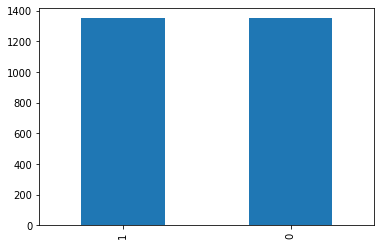

In [17]:
y_over = pd.Series(y1_res)
y_over.value_counts().plot(kind='bar')

In [20]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X_res, y1_res, train_size=0.8, test_size=0.2, random_state=0)

In [21]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X1_train, y1_train, train_size=0.9, test_size=0.1, random_state=0)

#X_train_val = X_train_val[0:1].shape
#X_val = X_val[0:1].shape

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers


model = Sequential()
model.add(Dense(32, input_dim=30, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

W0405 21:16:35.532476   852 deprecation.py:506] From F:\python\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0405 21:16:35.964490   852 deprecation.py:323] From F:\python\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                992       
_________________________________________________________________
batch_normalization (BatchNo (None, 32)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
batch_normalization_2 (Batch (None, 16)                64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [23]:
import numpy as np
#X_train_val = np.reshape(X_train_val, (X_train_val.shape[0], -1))
#X_val = np.reshape(X_val, (X_val.shape[0], -1))

history = model.fit(X_train_val, y_train_val, validation_data=(X_val, y_val), shuffle=False, epochs=100, batch_size=8, verbose=1)

Train on 1944 samples, validate on 216 samples
Epoch 1/100
1944/1944 [==============================] - 1s 556us/sample - loss: 0.4914 - acc: 0.7675 - val_loss: 0.4181 - val_acc: 0.8333
Epoch 2/100
1944/1944 [==============================] - 1s 299us/sample - loss: 0.4017 - acc: 0.8158 - val_loss: 0.3802 - val_acc: 0.8333
Epoch 3/100
1944/1944 [==============================] - 1s 299us/sample - loss: 0.3922 - acc: 0.8225 - val_loss: 0.3473 - val_acc: 0.8333
Epoch 4/100
1944/1944 [==============================] - 1s 301us/sample - loss: 0.3828 - acc: 0.8302 - val_loss: 0.3758 - val_acc: 0.8333
Epoch 5/100
1944/1944 [==============================] - 1s 297us/sample - loss: 0.3854 - acc: 0.8313 - val_loss: 0.3839 - val_acc: 0.8333
Epoch 6/100
1944/1944 [==============================] - 1s 304us/sample - loss: 0.3846 - acc: 0.8287 - val_loss: 0.3601 - val_acc: 0.8287
Epoch 7/100
1944/1944 [==============================] - 1s 323us/sample - loss: 0.3805 - acc: 0.8287 - val_loss: 0.378

1944/1944 [==============================] - 1s 297us/sample - loss: 0.3101 - acc: 0.8657 - val_loss: 0.3837 - val_acc: 0.8102
Epoch 60/100
1944/1944 [==============================] - 1s 312us/sample - loss: 0.2991 - acc: 0.8735 - val_loss: 0.3556 - val_acc: 0.8426
Epoch 61/100
1944/1944 [==============================] - 1s 299us/sample - loss: 0.2972 - acc: 0.8724 - val_loss: 0.3594 - val_acc: 0.8287
Epoch 62/100
1944/1944 [==============================] - 1s 344us/sample - loss: 0.3056 - acc: 0.8724 - val_loss: 0.3459 - val_acc: 0.8102
Epoch 63/100
1944/1944 [==============================] - 1s 320us/sample - loss: 0.3138 - acc: 0.8637 - val_loss: 0.4580 - val_acc: 0.7824
Epoch 64/100
1944/1944 [==============================] - 1s 318us/sample - loss: 0.3003 - acc: 0.8704 - val_loss: 0.3518 - val_acc: 0.8194
Epoch 65/100
1944/1944 [==============================] - 1s 313us/sample - loss: 0.3001 - acc: 0.8724 - val_loss: 0.3453 - val_acc: 0.8241
Epoch 66/100
1944/1944 [=========

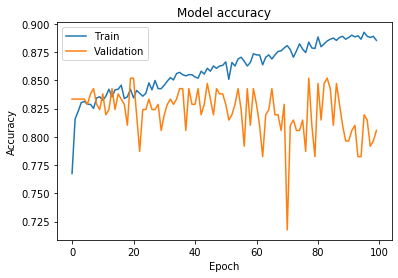

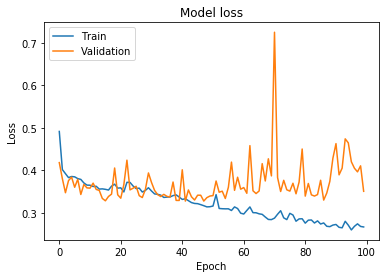

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
model.save('/my_model.h5')
model.evaluate(X1_test, y1_test)

540/540 [==============================] - 0s 39us/sample - loss: 0.3698 - acc: 0.8370


[0.3697625105027799, 0.837037]

In [ ]:
!jupyter nbconvert  Klasifikasi_ALL_tipe_L1.ipynb --to html